# Energy Statistics - Data analysis

This project aims to analyze energy production and consumption in India. The data has been taken from an open-source dataset. The dataset is called "International Energy Statistics", and data has been collected by United Nations Organisation. The database contains comprehensive energy statistics on the production, trade, conversion and final consumption of primary and secondary; conventional and non-conventional; and new and renewable sources of energy.

Dataset link: https://www.kaggle.com/unitednations/international-energy-statistics?select=all_energy_statistics.csv

Throughout this project, we are:
1) Downloading and importing the dataset
2) Cleaning data, and taking energy data about energy production and consumption in India
3) Exploring the energy production and consumption in India, employing data visualization (pie charts, line charts, bar charts, and heatmaps)

In [1]:
project_name = "India-energy-stat-EDA" 

## Data Preparation and Cleaning

In this part of the project, we are:

1) Importing the dataset 2) Getting energy data from India 3) Separating columns to make a better analysis 4) Remove non desired data 5) Converting units



Now, let's load the dataset to work upon !!

In [2]:
import pandas as pd
import numpy as np

e_df = pd.read_csv('./all_energy_statistics.csv')

e_df.head(10)

,country_or_area,commodity_transaction,year,unit,quantity,quantity_footnotes,category
0,Austria,Additives and Oxygenates - Exports,1996,"Metric tons, thousand",5.0,NaN,additives_and_oxygenates
1,Austria,Additives and Oxygenates - Exports,1995,"Metric tons, thousand",17.0,NaN,additives_and_oxygenates
2,Belgium,Additives and Oxygenates - Exports,2014,"Metric tons, thousand",0.0,NaN,additives_and_oxygenates
3,Belgium,Additives and Oxygenates - Exports,2013,"Metric tons, thousand",0.0,NaN,additives_and_oxygenates
4,Belgium,Additives and Oxygenates - Exports,2012,"Metric tons, thousand",35.0,NaN,additives_and_oxygenates
5,Belgium,Additives and Oxygenates - Exports,2011,"Metric tons, thousand",25.0,NaN,additives_and_oxygenates
6,Belgium,Additives and Oxygenates - Exports,2010,"Metric tons, thousand",22.0,NaN,additives_and_oxygenates
7,Belgium,Additives and Oxygenates - Exports,2009,"Metric tons, thousand",45.0,NaN,additives_and_oxygenates
8,Czechia,Additives and Oxygenates - Exports,1998,"Metric tons, thousand",1.0,NaN,additives_and_oxygenates
9,Czechia,Additives and Oxygenates - Exports,1995,"Metric tons, thousand",7.0,NaN,additives_and_oxygenates


In [3]:
rows = e_df.shape[0]
cols = e_df.shape[1]
print("The dataset contains {} columns and {} rows".format(cols,rows))

The dataset contains 7 columns and 1189482 rows


As we are only interested for data of country - India for this project. So, let's get a seperate dataframe for India

In [4]:
india_energy_df = e_df[e_df["country_or_area"] == "India"]
india_energy_df

,country_or_area,commodity_transaction,year,unit,quantity,quantity_footnotes,category
28900,India,"Bagasse - Consumption by manufacturing, constr...",2014,"Metric tons, thousand",97000.0,1.0,bagasse
28901,India,"Bagasse - Consumption by manufacturing, constr...",2013,"Metric tons, thousand",97000.0,1.0,bagasse
28902,India,"Bagasse - Consumption by manufacturing, constr...",2012,"Metric tons, thousand",95172.0,1.0,bagasse
28903,India,"Bagasse - Consumption by manufacturing, constr...",2011,"Metric tons, thousand",91495.0,1.0,bagasse
28904,India,"Bagasse - Consumption by manufacturing, constr...",2010,"Metric tons, thousand",67956.0,1.0,bagasse
...,...,...,...,...,...,...,...
1188661,India,Electricity - total wind production,1994,"Kilowatt-hours, million",182.0,NaN,wind_electricity
1188662,India,Electricity - total wind production,1993,"Kilowatt-hours, million",57.0,NaN,wind_electricity
1188663,India,Electricity - total wind production,1992,"Kilowatt-hours, million",52.0,NaN,wind_electricity
1188664,India,Electricity - total wind production,1991,"Kilowatt-hours, million",39.0,NaN,wind_electricity


It seems that in the column commodity_transaction we have information about the product and the energy flow, as explained in the attach documentation (Energy-Questionnaire-Guidelines.pdf).

In [5]:
print("The dataset containing data on India has {} rows".format(india_energy_df.shape[0]))

The dataset containing data on India has 7775 rows


However, it is difficult to analyze the products and the energy flow if we have them in a single column. For this reason, we can separate this column in product and energy_flow

In [6]:
india_energy_df[["energy_product", "energy_flow"]] = india_energy_df.commodity_transaction.str.split(" - ",1,expand=True)
india_energy_df

C:\Users\paida\AppData\Local\Temp\ipykernel_25560\1471838481.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  india_energy_df[["energy_product", "energy_flow"]] = india_energy_df.commodity_transaction.str.split(" - ",1,expand=True)
C:\Users\paida\AppData\Local\Temp\ipykernel_25560\1471838481.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  india_energy_df[["energy_product", "energy_flow"]] = india_energy_df.commodity_transaction.str.split(" - ",1,expand=True)


,country_or_area,commodity_transaction,year,unit,quantity,quantity_footnotes,category,energy_product,energy_flow
28900,India,"Bagasse - Consumption by manufacturing, constr...",2014,"Metric tons, thousand",97000.0,1.0,bagasse,Bagasse,"Consumption by manufacturing, construction and..."
28901,India,"Bagasse - Consumption by manufacturing, constr...",2013,"Metric tons, thousand",97000.0,1.0,bagasse,Bagasse,"Consumption by manufacturing, construction and..."
28902,India,"Bagasse - Consumption by manufacturing, constr...",2012,"Metric tons, thousand",95172.0,1.0,bagasse,Bagasse,"Consumption by manufacturing, construction and..."
28903,India,"Bagasse - Consumption by manufacturing, constr...",2011,"Metric tons, thousand",91495.0,1.0,bagasse,Bagasse,"Consumption by manufacturing, construction and..."
28904,India,"Bagasse - Consumption by manufacturing, constr...",2010,"Metric tons, thousand",67956.0,1.0,bagasse,Bagasse,"Consumption by manufacturing, construction and..."
...,...,...,...,...,...,...,...,...,...
1188661,India,Electricity - total wind production,1994,"Kilowatt-hours, million",182.0,NaN,wind_electricity,Electricity,total wind production
1188662,India,Electricity - total wind production,1993,"Kilowatt-hours, million",57.0,NaN,wind_electricity,Electricity,total wind production
1188663,India,Electricity - total wind production,1992,"Kilowatt-hours, million",52.0,NaN,wind_electricity,Electricity,total wind production
1188664,India,Electricity - total wind production,1991,"Kilowatt-hours, million",39.0,NaN,wind_electricity,Electricity,total wind production


Now we can remove the column - commodity_transaction

Cleaning energy_flow column

In [7]:
india_energy_df = india_energy_df.drop(["commodity_transaction"], axis=1)

In [8]:
for i in range(0, india_energy_df.shape[0]):
    if india_energy_df.iloc[i,7] == "total wind production" or india_energy_df.iloc[i,7] == "total thermal production" or india_energy_df.iloc[i,7] == "total solar production" or india_energy_df.iloc[i,7] == "total hydro production":
        india_energy_df.iloc[i,7] = "production"

Moreover, we are removing the columns quantity_footnotes and country_or_area

In [9]:
india_energy_df = india_energy_df.drop(["quantity_footnotes", "country_or_area"], axis=1)

In [10]:
india_energy_df = india_energy_df.reset_index(drop = True)

In [11]:
india_energy_df

,year,unit,quantity,category,energy_product,energy_flow
0,2014,"Metric tons, thousand",97000.0,bagasse,Bagasse,"Consumption by manufacturing, construction and..."
1,2013,"Metric tons, thousand",97000.0,bagasse,Bagasse,"Consumption by manufacturing, construction and..."
2,2012,"Metric tons, thousand",95172.0,bagasse,Bagasse,"Consumption by manufacturing, construction and..."
3,2011,"Metric tons, thousand",91495.0,bagasse,Bagasse,"Consumption by manufacturing, construction and..."
4,2010,"Metric tons, thousand",67956.0,bagasse,Bagasse,"Consumption by manufacturing, construction and..."
...,...,...,...,...,...,...
7770,1994,"Kilowatt-hours, million",182.0,wind_electricity,Electricity,production
7771,1993,"Kilowatt-hours, million",57.0,wind_electricity,Electricity,production
7772,1992,"Kilowatt-hours, million",52.0,wind_electricity,Electricity,production
7773,1991,"Kilowatt-hours, million",39.0,wind_electricity,Electricity,production


If we want to analyze the evolution of energy consumption and production, it could be interesting to know the first and the last year of data register

In [12]:
first_year = min(india_energy_df.year)
last_year = max(india_energy_df.year)
print("The dataset contains data from {} to {}".format(first_year, last_year))

The dataset contains data from 1990 to 2014


We can convert from Metric tons -> Metric tons, thousand, and Terajoules -> Kilowatt-hours, million -> Gigawatt-hours

In [13]:
for i in range(0, india_energy_df.shape[0]):
    if india_energy_df.iloc[i,1] == "Kilowatt-hours, million": # 1000000 KWh = 1 GWh
        india_energy_df.iloc[i,1] = "Gigawatt-hours"
    elif india_energy_df.iloc[i,1] == "Terajoules":
        india_energy_df.iloc[i,2] = india_energy_df.iloc[i,2] * 0.277 
        india_energy_df.iloc[i,1] = "Gigawatt-hours"
    elif india_energy_df.iloc[i,1] == "Metric Tons":
        india_energy_df.iloc[i,2] = india_energy_df.iloc[i,2] / 1000
        india_energy_df.iloc[i,1] = "Metric tons,  thousand"

In [14]:
india_energy_df.unit.unique().tolist()

['Metric tons,  thousand',
 'Gigawatt-hours',
 'Kilowatts,  thousand',
 'Cubic metres, thousand']

In [15]:
#india_energy_df.category.unique().tolist()
india_energy_df.energy_flow.unique().tolist()


['Consumption by manufacturing, construction and non-fuel industry',
 'Consumption by other manuf., const. and non-fuel ind.',
 'Final consumption',
 'Final energy consumption',
 'Production',
 'Total energy supply',
 'Exports',
 'Imports',
 'Non-energy uses',
 'production from refineries',
 'Consumption by iron and steel',
 'final consumption',
 'consumption by households',
 'consumption by Other',
 'production',
 'changes in stocks',
 'consumption by chemical and petrochemical industry',
 'Consumption by construction industry',
 'consumption by iron and steel industry',
 'consumption by manufacturing, construction and non-fuel mining industry',
 'Consumption by non-metallic minerals industry',
 'consumption by other manuf., const. and non-fuel ind.',
 'Consumption by paper, pulp and print',
 'Consumption by textile and leather',
 'Consumption not elsewhere specified (industry)',
 'energy industries own use',
 'exports',
 'imports',
 'own use by briquetting plants',
 'own use by gaswo

___
## Preparing data

Once we have cleaned the dataset, we are going to prepare the data for the exploratory analysis. To perform the analysis, it is necessaire to:
1) Get energy production, with special interest in electricity production
2) Tag the renewable energy and conventional energy
3) Compute the excess energy 
4) Get energy consumption by years
___

Get energy production

In [16]:
total_electricity_india_df = india_energy_df[india_energy_df.category == "total_electricity"]

# Get electricity production (energy_flow = NaN)
electricity_production_df = total_electricity_india_df[total_electricity_india_df.energy_flow.isna()]

# Split 
electricity_production_df[["energy_type", "producer"]] = electricity_production_df.energy_product.str.split(" – ",1,expand=True)

# Remove columns
electricity_production_df = electricity_production_df.drop(["energy_product"], axis=1)
electricity_production_df

C:\Users\paida\AppData\Local\Temp\ipykernel_25560\1088166802.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  electricity_production_df[["energy_type", "producer"]] = electricity_production_df.energy_product.str.split(" – ",1,expand=True)
C:\Users\paida\AppData\Local\Temp\ipykernel_25560\1088166802.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  electricity_production_df[["energy_type", "producer"]] = electricity_production_df.energy_product.str.split(" – ",1,expand=True)


,year,unit,quantity,category,energy_flow,energy_type,producer
7483,2014,Gigawatt-hours,159837.0,total_electricity,None,From combustible fuels,Autoproducer
7484,2013,Gigawatt-hours,188122.0,total_electricity,None,From combustible fuels,Autoproducer
7485,2012,Gigawatt-hours,128172.0,total_electricity,None,From combustible fuels,Autoproducer
7486,2011,Gigawatt-hours,128172.0,total_electricity,None,From combustible fuels,Autoproducer
7487,2010,Gigawatt-hours,109464.0,total_electricity,None,From combustible fuels,Autoproducer
...,...,...,...,...,...,...,...
7668,1994,Gigawatt-hours,51.0,total_electricity,None,Wind,Main activity
7669,1993,Gigawatt-hours,51.0,total_electricity,None,Wind,Main activity
7670,1992,Gigawatt-hours,50.0,total_electricity,None,Wind,Main activity
7671,1991,Gigawatt-hours,39.0,total_electricity,None,Wind,Main activity


In [17]:
electricity_production_df = electricity_production_df.drop(["energy_flow"], axis=1)  ##we don't need this column now
electricity_production_df = electricity_production_df.drop(["category"], axis=1)  ## as we are dealing with total electricity only
electricity_production_df

,year,unit,quantity,energy_type,producer
7483,2014,Gigawatt-hours,159837.0,From combustible fuels,Autoproducer
7484,2013,Gigawatt-hours,188122.0,From combustible fuels,Autoproducer
7485,2012,Gigawatt-hours,128172.0,From combustible fuels,Autoproducer
7486,2011,Gigawatt-hours,128172.0,From combustible fuels,Autoproducer
7487,2010,Gigawatt-hours,109464.0,From combustible fuels,Autoproducer
...,...,...,...,...,...
7668,1994,Gigawatt-hours,51.0,Wind,Main activity
7669,1993,Gigawatt-hours,51.0,Wind,Main activity
7670,1992,Gigawatt-hours,50.0,Wind,Main activity
7671,1991,Gigawatt-hours,39.0,Wind,Main activity


Get 2014 productions

In [18]:
electricity_production_2014_df = electricity_production_df[electricity_production_df.year == 2014]
main_electricity_production_2014_df = electricity_production_df[(electricity_production_df.year == 2014) & (electricity_production_df.producer == "Main activity")]
auto_electricity_production_2014_df = electricity_production_df[(electricity_production_df.year == 2014) & (electricity_production_df.producer == "Autoproducer")]

# Get big-scale energy production
total_main_electricity_production_2014 = float(total_electricity_india_df[(total_electricity_india_df.year == 2014) & (total_electricity_india_df.energy_flow == "total production, main activity")]["quantity"])
# Get autoconsumption energy production
total_auto_electricity_production_2014 = float(total_electricity_india_df[(total_electricity_india_df.year == 2014) & (total_electricity_india_df.energy_flow == "total production, autoproducer")]["quantity"])

# Normalize to get percentage
for i in range(0, main_electricity_production_2014_df.shape[0]):
    main_electricity_production_2014_df.iloc[i, 2] = main_electricity_production_2014_df.iloc[i, 2] / total_main_electricity_production_2014

Get 1990 productions

In [19]:
electricity_production_1990_df = electricity_production_df[electricity_production_df.year == 1990]
main_electricity_production_1990_df = electricity_production_df[(electricity_production_df.year == 1990) & (electricity_production_df.producer == "Main activity")]
auto_electricity_production_1990_df = electricity_production_df[(electricity_production_df.year == 1990) & (electricity_production_df.producer == "Autoproducer")]

# Get big-scale energy production
total_main_electricity_production_1990 = float(total_electricity_india_df[(total_electricity_india_df.year == 1990) & (total_electricity_india_df.energy_flow == "total production, main activity")]["quantity"])
# Get autoconsumption energy production
total_auto_electricity_production_1990 = float(total_electricity_india_df[(total_electricity_india_df.year == 1990) & (total_electricity_india_df.energy_flow == "total production, autoproducer")]["quantity"])

# Normalize to get percentage
for i in range(0, main_electricity_production_1990_df.shape[0]):
    main_electricity_production_1990_df.iloc[i, 2] = main_electricity_production_1990_df.iloc[i, 2] / total_main_electricity_production_1990

Energy Consumption across years

In [20]:
total_energy_consumption_df = total_electricity_india_df[total_electricity_india_df.energy_flow == "Final energy consumption"]
total_net_production_df = total_electricity_india_df[total_electricity_india_df.energy_flow == "net production"]
production_vs_consumption_df = pd.concat([total_energy_consumption_df, total_net_production_df], axis = 0)


Excess Energy

In [21]:
diff_energy_df = pd.DataFrame(columns = ["year", "energy_diff"])
diff_energy_df.year = total_energy_consumption_df.year
diff_energy_df.energy_diff = total_net_production_df.quantity.to_numpy() - total_energy_consumption_df.quantity.to_numpy()

Tag renewable and conventional energy.

Definitions:

- Conventional: limited energy sources. There are 2 categories: energy taken from combustible fuels and nuclear energy
- Renewable: energy sources that are unlimited in nature (they are inexhaustible or their regeneration are rapid)

In [22]:
renewable_list = ["Hydro", "Of which: Pumped hydro", "Solar", "Solar photovoltaic", "Solar thermal", "Wind"]
conventional_list = ["From combustible fuels", "Nuclear"]

electricity_production_df["energy_group"] = None
for i in range(0, electricity_production_df.shape[0]):
    if electricity_production_df.energy_type.iloc[i] in renewable_list:
        electricity_production_df.energy_group.iloc[i] = "Renewable"
    elif electricity_production_df.energy_type.iloc[i] in conventional_list:
        electricity_production_df.energy_group.iloc[i] = "Conventional"

C:\Users\paida\AppData\Local\Temp\ipykernel_25560\938313609.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  electricity_production_df.energy_group.iloc[i] = "Conventional"
C:\Users\paida\AppData\Local\Temp\ipykernel_25560\938313609.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  electricity_production_df.energy_group.iloc[i] = "Renewable"


In [23]:
conventional_energy_df = electricity_production_df[electricity_production_df.energy_group == "Conventional"]
renewable_energy_df = electricity_production_df[electricity_production_df.energy_group == "Renewable"]

## Exploratory Analysis and Visualization

In this section, we're going to explore the data by plotting different graphs. Specifically, we are exploring:

1) Net production and consumption in India 2) The energy excess (production - consumption) 3) Evolution of the big scale electricity generation sources 4) The energy production with conventional and renewable energy

Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [24]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (20, 10)

so, lets see whats the trend between consumption and production of energy in India between years 1990 and 2014

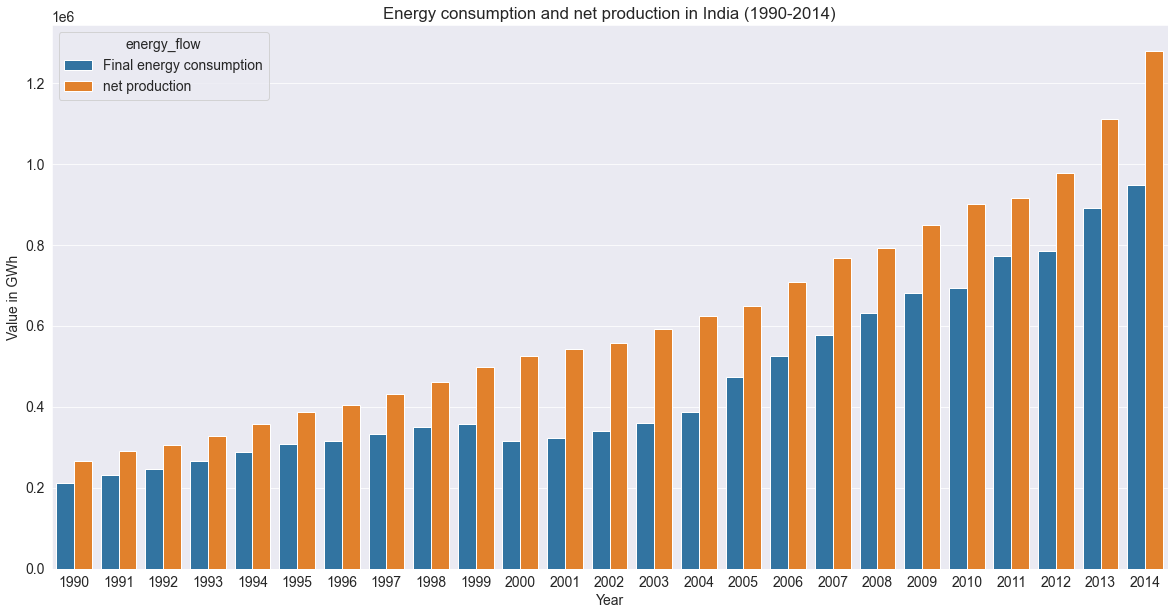

In [25]:
sns.barplot(x="year", y = "quantity", hue="energy_flow", data=production_vs_consumption_df);
plt.title("Energy consumption and net production in India (1990-2014)");
plt.xlabel("Year");
plt.ylabel("Value in GWh");

In the previous chart, we can see a difference between production and consumption. If we plot this difference, we can see that the energy excess grew from 1990 to 2008.

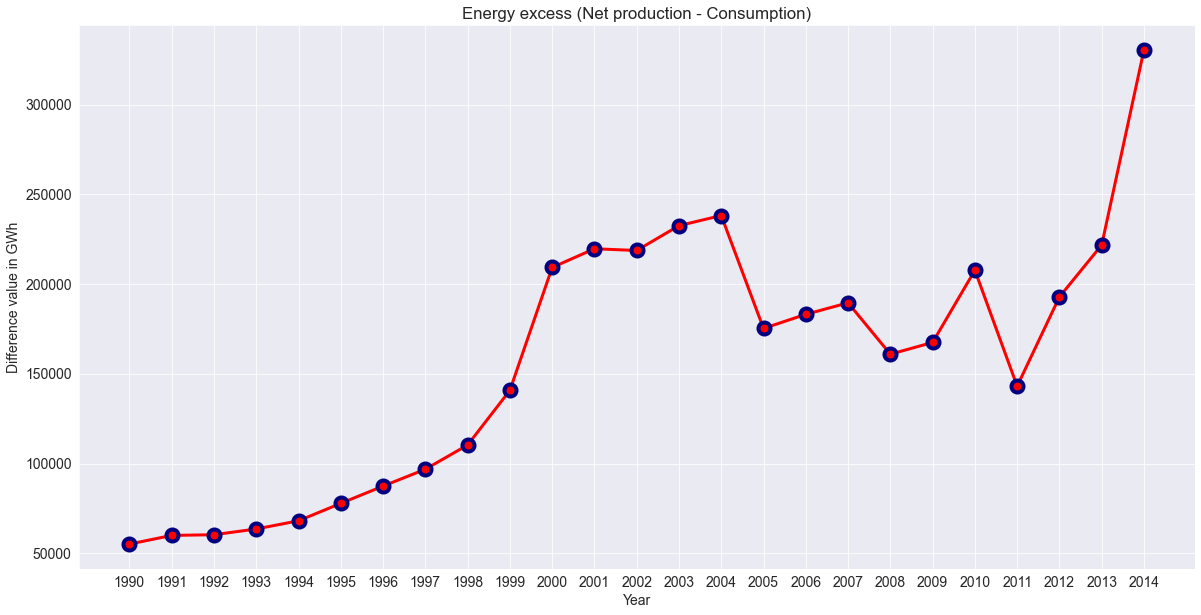

In [26]:
plt.plot(diff_energy_df.year, diff_energy_df.energy_diff, 'r-o', linewidth=3, markersize=12, markeredgewidth=4, markeredgecolor='navy');
plt.xticks(diff_energy_df.year);
plt.xlabel("Year");
plt.ylabel("Difference value in GWh");
plt.title("Energy excess (Net production - Consumption)");

In addition, we could analyze the influence of global warming and the policies to stop them in energy production. If we represent conventional production and renewable energy production, we will see that conventional production is getting low, while renewable energy usage is growing.

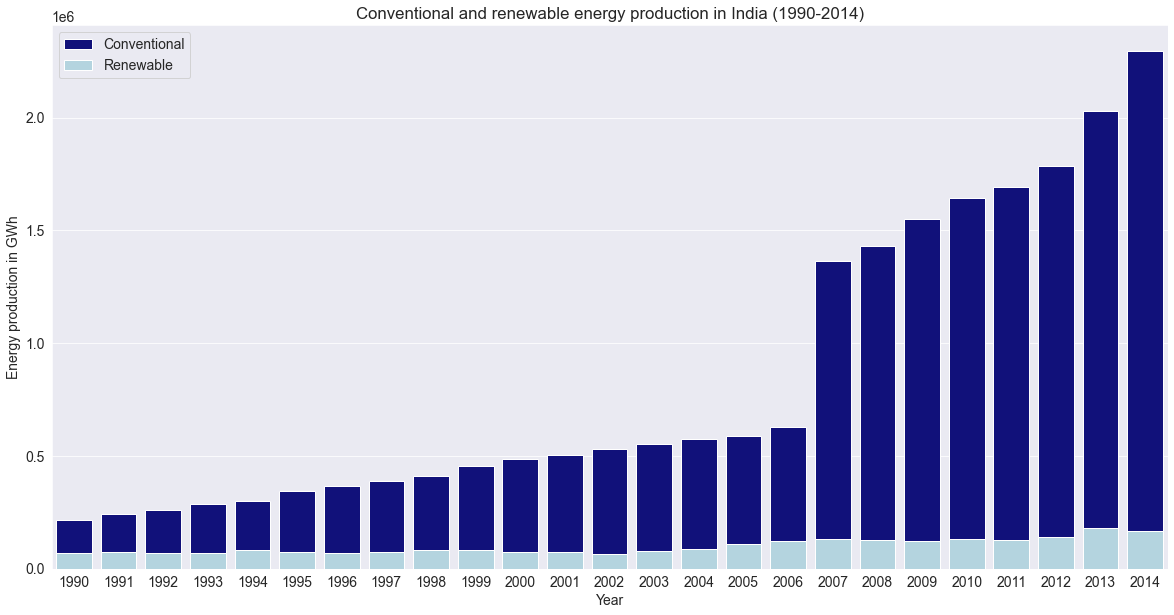

In [27]:
conventional_vs_renewable_df = pd.concat([conventional_energy_df.sum(), renewable_energy_df.sum()], axis = 0).reset_index(drop=True)
conventional_production_df = electricity_production_df[electricity_production_df.energy_group == "Conventional"].groupby(["year", "energy_group"], as_index=False).sum()
renewable_production_df = electricity_production_df[electricity_production_df.energy_group == "Renewable"].groupby(["year", "energy_group"], as_index=False).sum()

sns.barplot(x="year", y="quantity", data=conventional_production_df, color="darkblue", label = "Conventional")
sns.barplot(x="year", y="quantity", data=renewable_production_df, color = "lightblue", label = "Renewable")
plt.legend()
plt.xlabel("Year");
plt.ylabel("Energy production in GWh");
plt.title("Conventional and renewable energy production in India (1990-2014)");

Moreover, to understand the evolution of energy production, we can represent the production distribution in 1990 and 2014. 

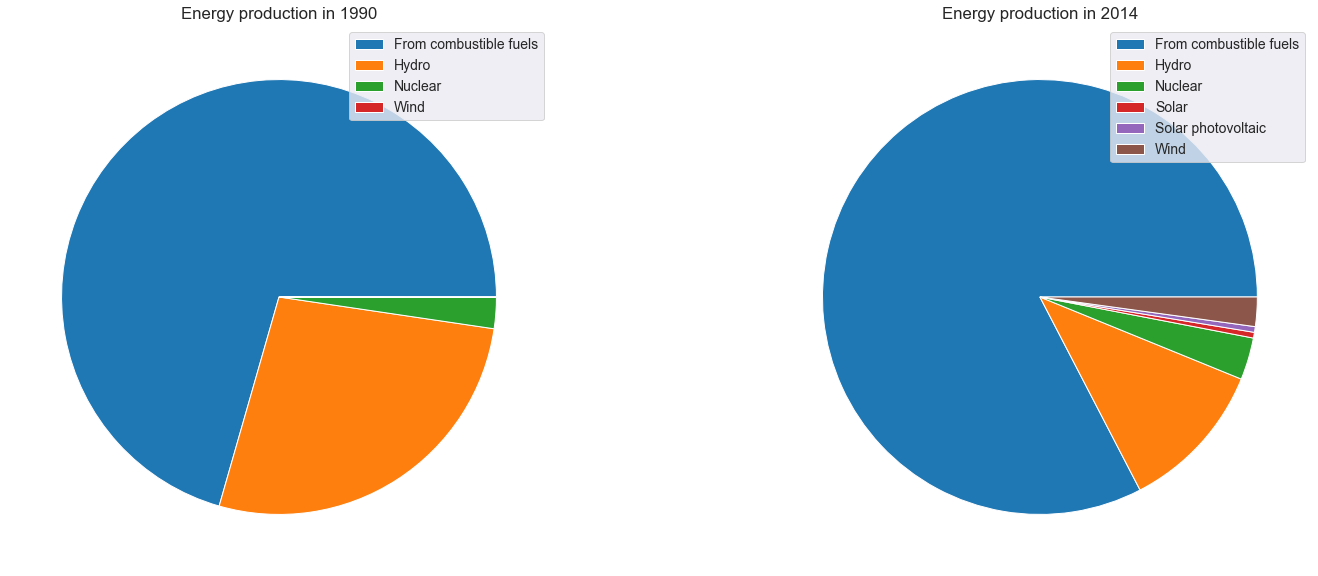

In [28]:
fig, axs = plt.subplots(1,2)
fig.set_size_inches(25,10)
axs[0].pie(main_electricity_production_1990_df.quantity)
axs[0].legend(main_electricity_production_1990_df.energy_type)
axs[0].set_title("Energy production in 1990")

axs[1].pie(main_electricity_production_2014_df.quantity)
axs[1].legend(main_electricity_production_2014_df.energy_type)
axs[1].set_title("Energy production in 2014");

The pie chart shows a more renewable sources, but fuel combustion energy production has increasing proportion, while wind energy has a greater impact.

## Asking and Answering Questions


#### Q1: Which is the year with the highest quantity of exported energy? And the highest importation year?

In [29]:
imports_df = total_electricity_india_df[total_electricity_india_df.energy_flow == "imports"]
max_importation_year = imports_df[imports_df.quantity == max(imports_df.quantity)].year
print("The highest amount of energy importated in India was in {}".format(int(max_importation_year)))

The highest amount of energy importated in India was in 2011


In [30]:
exports_df = total_electricity_india_df[total_electricity_india_df.energy_flow == "exports"]
max_exportation_year = exports_df[exports_df.quantity == max(exports_df.quantity)].year
print("The highest amount of energy exportated in India was in {}".format(int(max_exportation_year)))

The highest amount of energy exportated in India was in 2010


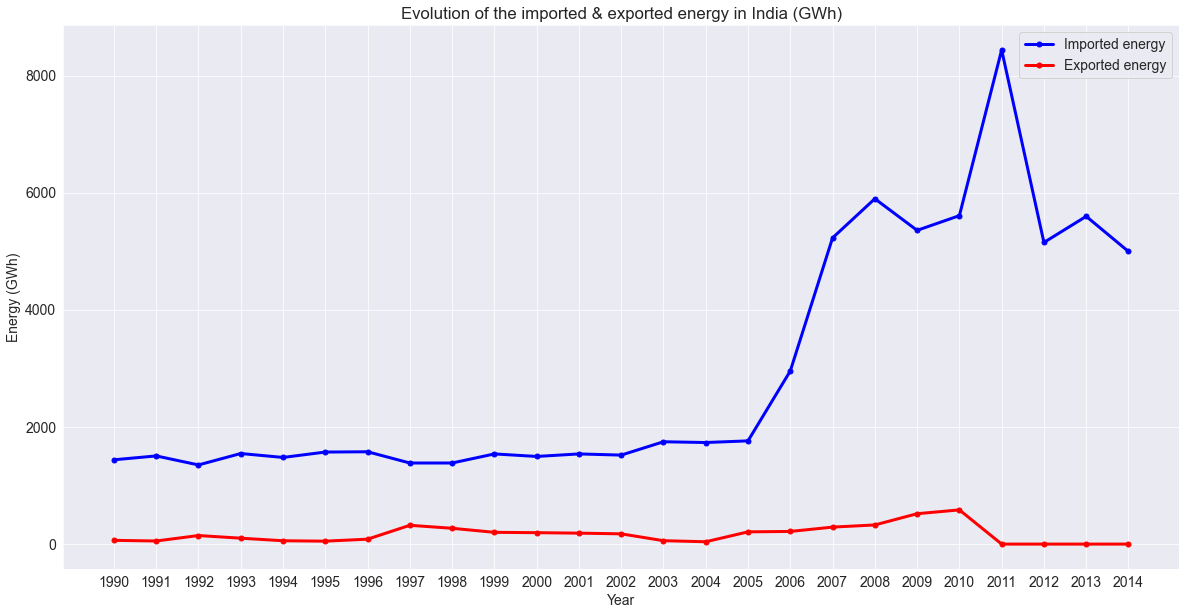

In [31]:
# Plot evolution
plt.plot(imports_df.year, imports_df.quantity, "b-o", linewidth = 3, markersize=5);
plt.plot(exports_df.year, exports_df.quantity, "r-o", linewidth = 3, markersize=5);
plt.legend(labels=["Imported energy", "Exported energy"]);
plt.xticks(imports_df.year);
plt.title("Evolution of the imported & exported energy in India (GWh)");
plt.xlabel("Year");
plt.ylabel("Energy (GWh)");

#### Q2: Due to energy transportation, we can't take profit from all the energy produced. Which is the year with the largest losses? And the year with the lowest losses?

In [32]:
losses_df = total_electricity_india_df[total_electricity_india_df.energy_flow == "Losses"]
max_losses_year = losses_df[losses_df.quantity == max(losses_df.quantity)].year
print("{} was the year whith the highest energy losses in India".format(int(max_losses_year)))

2014 was the year whith the highest energy losses in India


In [33]:
min_losses_year = losses_df[losses_df.quantity == min(losses_df.quantity)].year
print("{} was the year whith the lowest energy losses in India".format(int(min_losses_year)))

1990 was the year whith the lowest energy losses in India


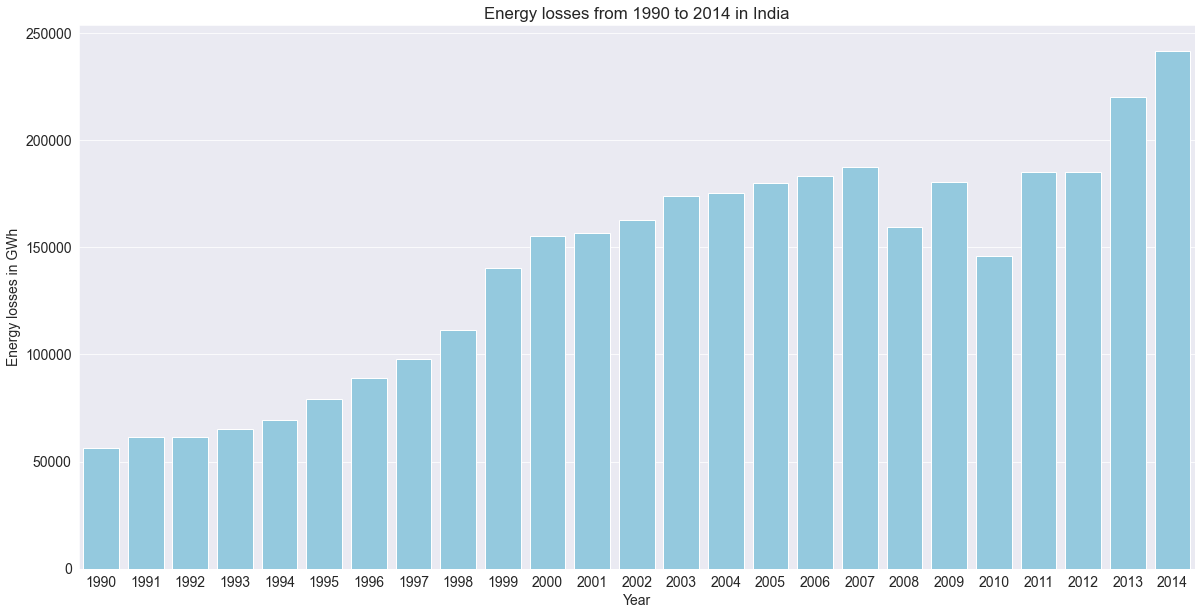

In [34]:
sns.barplot(x="year", y="quantity", data=losses_df, color="skyblue");
plt.xlabel("Year");
plt.ylabel("Energy losses in GWh");
plt.title("Energy losses from 1990 to 2014 in India");

#### Q3: We can divide the losses by the net production to know how much energy is lossed per GWh produced. This index, shows the same results as the losses?

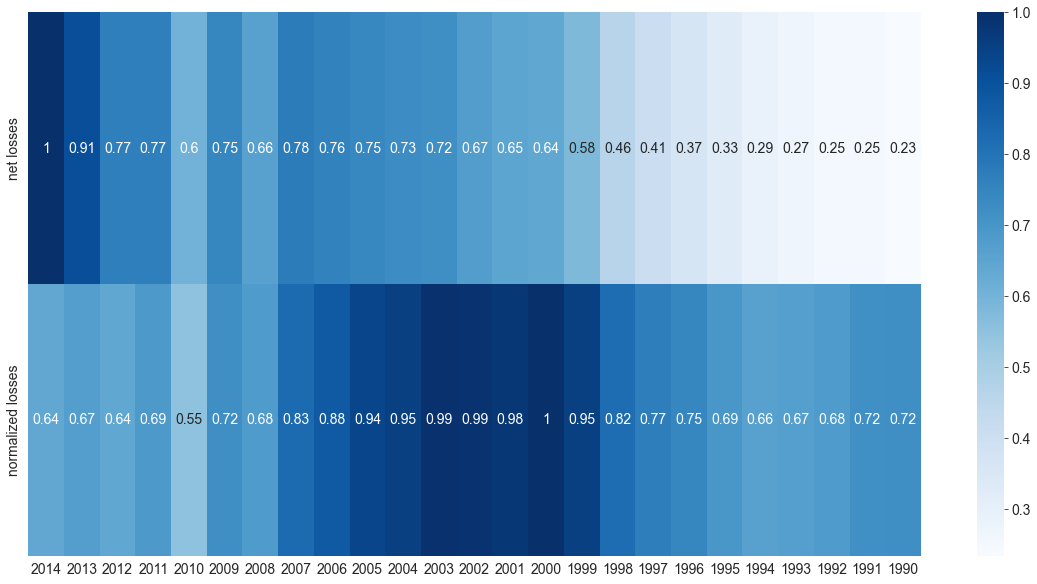

In [35]:
# Get normalized losses to net production
index_losses = losses_df.quantity.to_numpy() / total_net_production_df.quantity.to_numpy()

years = losses_df.year.tolist()
losses_graph = pd.DataFrame(index = ["net losses", "normalized losses"], columns=years)
for i in range(0, len(years)):
    losses_graph.iloc[0, i] = int(losses_df[losses_df.year == years[i]].quantity)
    losses_graph.iloc[1, i] = index_losses[i]

# Normalize by maximum in the row
losses_graph.loc["net losses"] = losses_graph.loc["net losses"] / max(losses_graph.loc["net losses"])
losses_graph.loc["normalized losses"] = losses_graph.loc["normalized losses"] / max(losses_graph.loc["normalized losses"])

losses_graph = losses_graph[losses_graph.columns].astype(float)
sns.heatmap(losses_graph, annot=True, cmap='Blues');

If we compare the net losses we could conclude that 1990 was the best year in terms of losses (lowest). However, this conclusion is not correct: India had lower energy losses because production was also low.

#### Q4: Which is the year with the highest quantity of renewable energy produced?

In [36]:
total_renewable_production = renewable_energy_df.groupby("year").sum()
max_ren_prod_year = total_renewable_production[total_renewable_production.quantity == max(total_renewable_production.quantity)]
print("The largest renewable energy production war registered in the year {}".format(max_ren_prod_year.index[0]))

The largest renewable energy production war registered in the year 2013


#### Q5: In India, what kind of renewable energy has had the biggest development over the years (big scale production)?

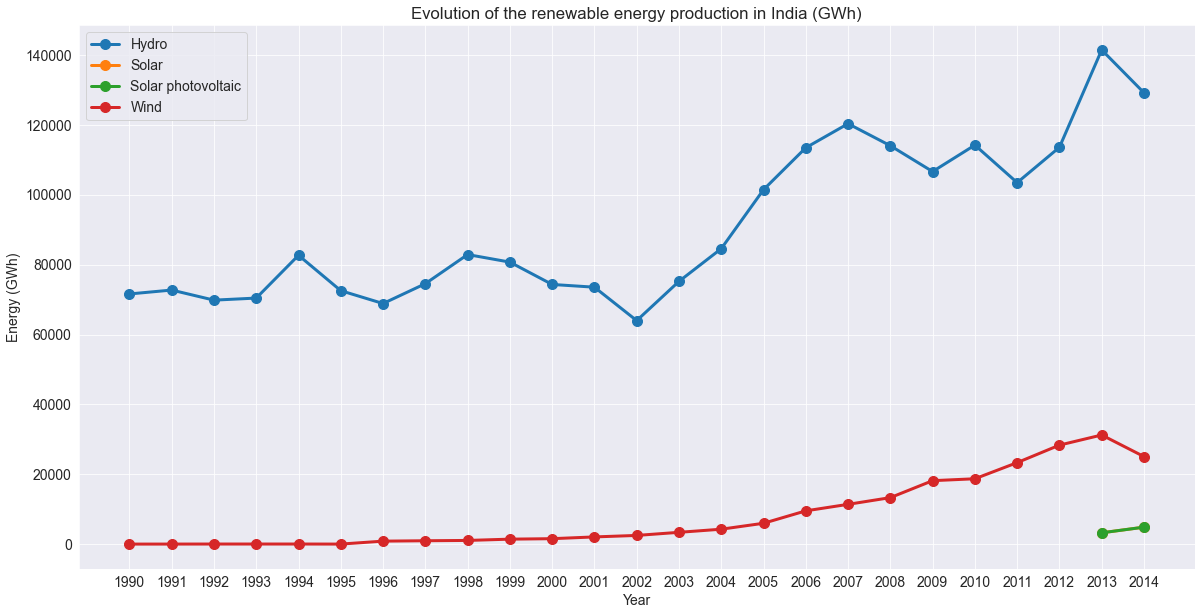

In [37]:
for e in renewable_energy_df.energy_type.unique().tolist():
    energy = renewable_energy_df[(renewable_energy_df.energy_type == e) & (renewable_energy_df.producer == "Main activity")]
    plt.plot(energy.year, energy.quantity, "-o", linewidth=3, markersize=10)

plt.legend(labels=renewable_energy_df.energy_type.unique().tolist());
plt.xticks(renewable_energy_df.year.unique().tolist());
plt.title("Evolution of the renewable energy production in India (GWh)");
plt.xlabel("Year");
plt.ylabel("Energy (GWh)");

If we attend to the previous graph, we can see that Hydro and wind energy has had a great development in India from 1990.
And It has started generating solar energy in 2013

### Another Interesting Question - Analysing the evolution from 1990 to 2014, in terms of energy, which is the most demandant Industry in India?

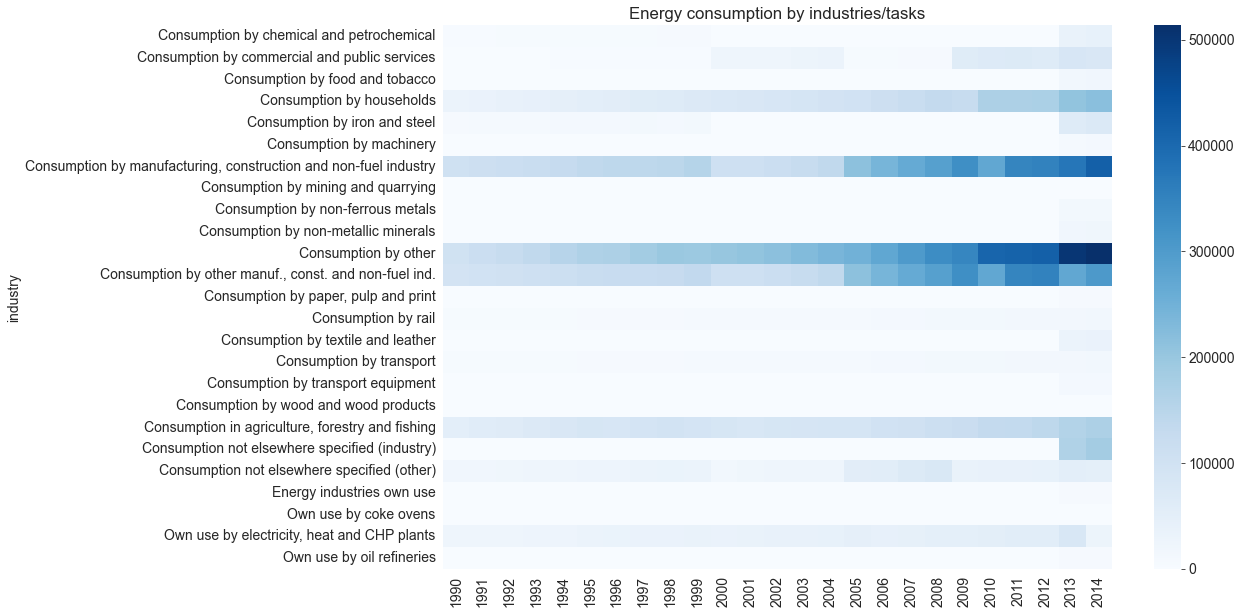

In [38]:
# Remove non industry rows of the dataframe
non_industry_consumption_list = ["imports", "exports", "Losses", "net production", "Final energy consumption", "Gross demand", "Gross production", "total production, autoproducer", "total production, main activity"]
industry_consumption_df = total_electricity_india_df

for i in non_industry_consumption_list:
    industry_consumption_df = industry_consumption_df.loc[industry_consumption_df.energy_flow != i]

industry_consumption_df = industry_consumption_df.dropna()

# Construct a dataframe where rows are the consumption sectors and the columns are the years
industries_list = industry_consumption_df.energy_flow.unique().tolist()
years_list = industry_consumption_df.year.unique().tolist()
years_list.sort()
industry_map = pd.DataFrame(index=industries_list, columns=years_list)
industry_map.index.name = "industry"

for ind in industries_list:
    for y in years_list:
        data = industry_consumption_df[(industry_consumption_df.year == y) & (industry_consumption_df.energy_flow == ind)].quantity.to_numpy()
        if data.size == 0:
            data = int(0)
        
        industry_map.loc[ind, y] = int(data)

# heatmap
industry_map = industry_map[industry_map.columns].astype(float)

fig = plt.figure(figsize=[15,10])
sns.heatmap(industry_map, cmap='Blues');
plt.title("Energy consumption by industries/tasks");

We see that consumption_by_other industries is highest in India. Now, according to the dataset description in the document "Energy-Questionnaire-Guidelines", the category consumption by other includes household, commerce and public services, agriculture, forestry, fishing and other activities (including defence). Besides this, Consumption of manufacturing and construction industry is also significant in India

## Inferences and Conclusion

In this document has been analyzed the energy production and consumption in India by importing, cleaning, and preparing data from the database "International Energy Statistics". To have a better comprehension, data has been represented employing different graphs.

From the analysis we take a set of conclusions:

- The usage of renewable energy sources is growing. However, in India, combustible fuels still cover a major part of energy production.
- Data about energy losses show a slight improvement in energy transport.
- In India, Hydro and wind energy has had a remarkable development.
- The gross energy consumption is spent in the household, public services, commerce, agriculture, forestry, and fishing.

___
## Future Work

The dataset presented has information about the energy production and consumption of a large number of countries and regions. It could be interesting to analyze other countries to understand the way the world uses energy in a cultural and economic context.
Also, it contains data only upto year 2014. if we have the dataset updated with recent year data added then we can get the recent trends and scenario of energy statistics of many countries

___
___
## References:
Kaggle: https://www.kaggle.com/